## simple linear Regression


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('weight_height_50.csv')

In [4]:
df.head()

,Weight,Height
0,84,141
1,87,149
2,93,197
3,40,172
4,43,171


Text(0, 0.5, ' Y - axis')

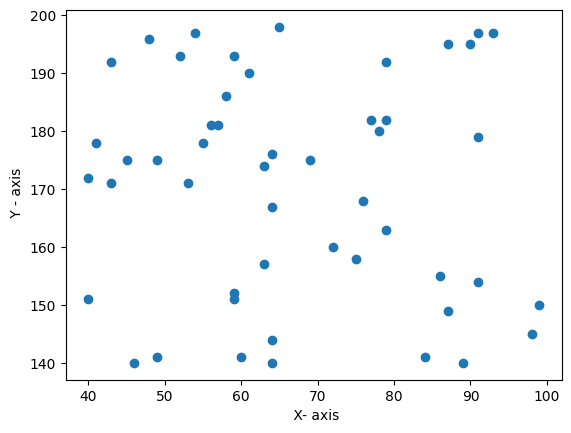

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel(' X- axis')
plt.ylabel(' Y - axis')

In [6]:
df=pd.read_csv('linear_regression_height_weight.csv')

In [7]:
df.head()

,Height_cm,Weight_kg
0,169.97,63.62
1,163.62,56.49
2,171.48,62.98
3,180.23,73.43
4,162.66,58.45


Text(0, 0.5, ' Y - axis')

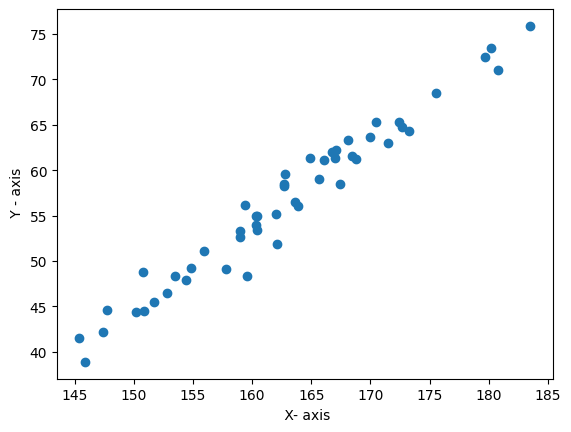

In [8]:
plt.scatter(df['Height_cm'],df['Weight_kg'])
plt.xlabel(' X- axis')
plt.ylabel(' Y - axis')

In [9]:
#divide our dataset into independent and dependent features
x = df[['Weight_kg']]
y = df['Height_cm']

In [10]:
from sklearn.model_selection import train_test_split


In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [12]:
x.shape

(50, 1)

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((40, 1), (10, 1), (40,), (10,))

In [14]:
## stndardize the dataset train independent data
from sklearn.preprocessing import StandardScaler


In [15]:
scaler = StandardScaler()


In [16]:
 x_train = scaler.fit_transform(x_train)

In [17]:
x_test =scaler.transform(x_test)

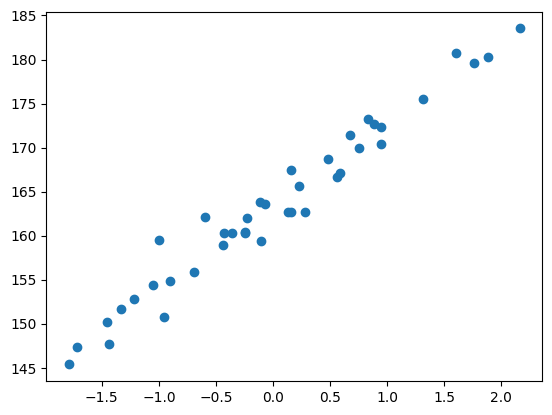

In [18]:
plt.scatter(x_train,y_train)

In [19]:
#train the simple linear regression 
from sklearn.linear_model import LinearRegression

In [20]:
regression = LinearRegression()

In [21]:
regression.fit(x_train,y_train)

LinearRegression()

In [22]:
print("The slope or coef of weight is ",regression.coef_)
print("The intercept :",regression.intercept_)

The slope or coef of weight is  [9.31406045]
The intercept : 163.393


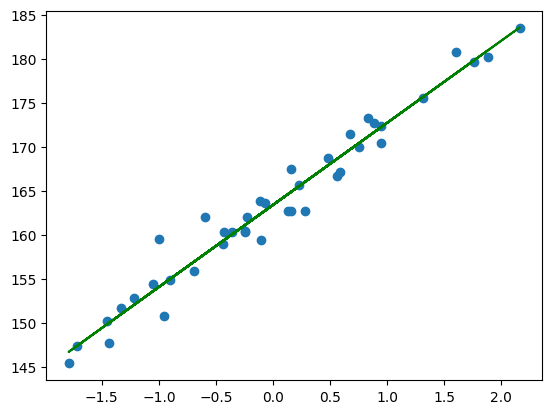

In [23]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train),color='green')

In [24]:
y_pred_test = regression.predict(x_test)

(array([143.9052428 , 167.91539393, 158.64775416, 154.8335579 ,
        170.10105695, 168.23681496, 154.00857725, 167.74396938,
        167.94753603, 149.91581611]),
 0     169.97
 1     163.62
 2     171.48
 3     180.23
 4     162.66
 5     162.66
 6     180.79
 7     172.67
 8     160.31
 9     170.43
 10    160.37
 11    160.34
 12    167.42
 13    145.87
 14    147.75
 15    159.38
 16    154.87
 17    168.14
 18    155.92
 19    150.88
 20    179.66
 21    162.74
 22    165.68
 23    150.75
 24    159.56
 25    166.11
 26    153.49
 27    168.76
 28    158.99
 29    162.08
 30    158.98
 31    183.52
 32    164.87
 33    154.42
 34    173.23
 35    152.79
 36    167.09
 37    145.40
 38    151.72
 39    166.97
 40    172.38
 41    166.71
 42    163.84
 43    161.99
 44    150.21
 45    157.80
 46    160.39
 47    175.57
 48    168.44
 49    147.37
 Name: Height_cm, dtype: float64)

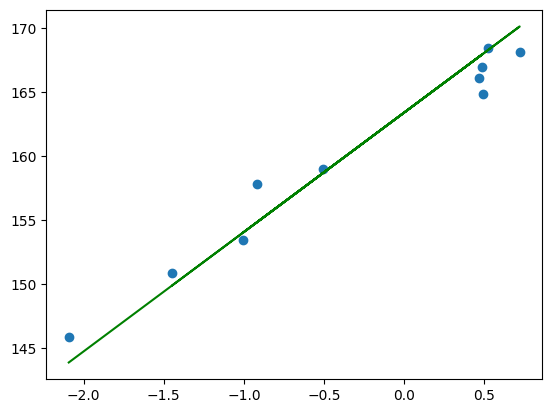

In [27]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regression.predict(x_test),color='green')

# performance matrics
## mse,mae ,rmse
# R square and adjusted R square 


In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [37]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

3.0890891979465644
1.4567347616970665
1.7575804954387053


In [39]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
score

0.9465532061320239

## Adjusted R square 


**Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-l)]**

where:
R2 = The R2 of the model
n: = The number of observation
k: = The number of predictor variables

In [43]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.9398723568985269

In [44]:
regression

LinearRegression()

In [45]:
scaled_weight = scaler.transform([[80]])
scaled_weight 

C:\Users\suyas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[2.63662002]])

In [48]:
print("The hieght prediction for weight is 80 kg is :",regression.predict([scaled_weight[0]]))

The hieght prediction for weight is 80 kg is : [187.95063829]


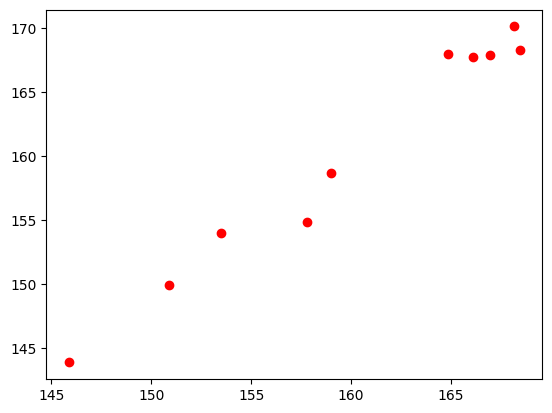

In [51]:
## Assumptions
## plot scatter plot
plt.scatter(y_test,y_pred_test,color = 'red')

In [53]:
residual = y_test - y_pred_test
residual

13    1.964757
39   -0.945394
30    0.332246
45    2.966442
17   -1.961057
48    0.203185
26   -0.518577
25   -1.633969
32   -3.077536
19    0.964184
Name: Height_cm, dtype: float64

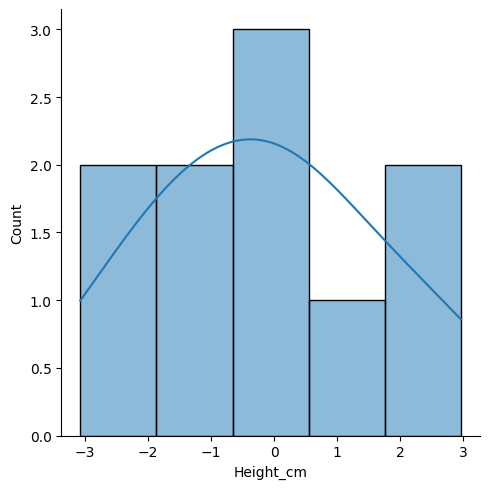

In [55]:
# residual
import seaborn as sns
sns.displot(residual,kde = True)

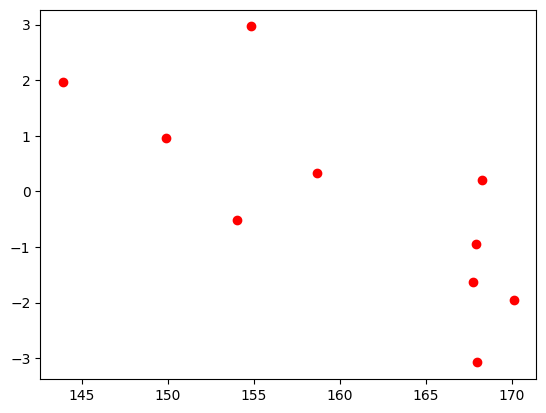

In [56]:
plt.scatter(y_pred_test,residual,color = 'red')